# Selecting Subsets of Data

## Könyv 113. oldal
Selecting Series data
Series and DataFrames are complex data containers that have multiple attributes that use
the indexing operator to select data in different ways. In addition to the indexing operator
itself, the .iloc and .loc attributes are available and use the indexing operator in their
own unique ways. Collectively, these attributes are called the indexers.
The indexing terminology can get confusing. The term indexing operator
is used here to distinguish it from the other indexers. It refers to the
brackets, [] directly after a Series or DataFrame. For instance, given a
Series s, you can select data in the following ways: s[item] and
s.loc[item]. The first uses the indexing operator. The second uses the
.loc indexer.
Series and DataFrame indexers allow selection by integer location (like Python lists) and by
label (like Python dictionaries). The .iloc indexer selects only by integer location and
works similarly to Python lists. The .loc indexer selects only by index label, which is
similar to how Python dictionaries work.

In [1]:
import pandas as pd
import numpy as np
#college = pd.read_csv('C:\Anaconda\data\college.csv')
college = pd.read_csv(r'https://raw.githubusercontent.com/tamasszuhai/source_files/master/college.csv', index_col='INSTNM')
college.head(7)

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5
The University of Alabama,Tuscaloosa,AL,0.0,0.0,0.0,0,555.0,565.0,0.0,29851.0,...,0.0261,0.0268,0.0026,0.0844,1,0.2040,0.4010,0.0853,41900,23750
Central Alabama Community College,Alexander City,AL,0.0,0.0,0.0,0,NaN,NaN,0.0,1592.0,...,0.0000,0.0000,0.0019,0.3882,1,0.5892,0.3977,0.3153,27500,16127


In [2]:
city = college['CITY']
city.head()

INSTNM
Alabama A & M University                   Normal
University of Alabama at Birmingham    Birmingham
Amridge University                     Montgomery
University of Alabama in Huntsville    Huntsville
Alabama State University               Montgomery
Name: CITY, dtype: object

In [3]:
city.shape

(7535,)

In [4]:
city.value_counts()

New York          87
Chicago           78
Houston           72
Los Angeles       56
Miami             51
San Antonio       49
Dallas            48
Philadelphia      46
Brooklyn          46
Phoenix           41
Jacksonville      41
Atlanta           41
Portland          39
Springfield       37
Columbus          37
Indianapolis      36
Washington        34
Austin            33
Pittsburgh        33
Nashville         32
San Diego         32
Boston            31
Tampa             31
Kansas City       30
Cincinnati        30
Rochester         30
Columbia          29
Memphis           29
Denver            27
Charlotte         27
                  ..
Sherman Oaks       1
Hampden-Sydney     1
Pinehurst          1
Cranbury           1
Winterville        1
McKeesport         1
Riverhead          1
Delhi              1
Canandaigua        1
Aston              1
Marianna           1
Crestwood          1
West Nyack         1
Oak Park           1
North Olmsted      1
Mountain Home      1
Loch Sheldrak

In [5]:
city.iloc[3]

'Huntsville'

In [6]:
#This returns a Series:
city.iloc[[10,20,30]]

INSTNM
Birmingham Southern College                            Birmingham
George C Wallace State Community College-Hanceville    Hanceville
Judson College                                             Marion
Name: CITY, dtype: object

In [7]:
#To select an equally spaced partition of data, use slice notation:
city.iloc[4:50:10]

INSTNM
Alabama State University              Montgomery
Enterprise State Community College    Enterprise
Heritage Christian University           Florence
Marion Military Institute                 Marion
Reid State Technical College           Evergreen
Name: CITY, dtype: object

Now we turn to the .loc indexer, which selects only with index labels. Passing a
single string returns a scalar value:

In [8]:
college.index

Index(['Alabama A & M University', 'University of Alabama at Birmingham',
       'Amridge University', 'University of Alabama in Huntsville',
       'Alabama State University', 'The University of Alabama',
       'Central Alabama Community College', 'Athens State University',
       'Auburn University at Montgomery', 'Auburn University',
       ...
       'Strayer University-North Dallas', 'Strayer University-San Antonio',
       'Strayer University-Stafford', 'WestMed College - Merced',
       'Vantage College', 'SAE Institute of Technology  San Francisco',
       'Rasmussen College - Overland Park',
       'National Personal Training Institute of Cleveland',
       'Bay Area Medical Academy - San Jose Satellite Location',
       'Excel Learning Center-San Antonio South'],
      dtype='object', name='INSTNM', length=7535)

In [9]:
college.loc['Heritage Christian University']

CITY                           Florence
STABBR                               AL
HBCU                                  0
MENONLY                               0
WOMENONLY                             0
RELAFFIL                              1
SATVRMID                            NaN
SATMTMID                            NaN
DISTANCEONLY                          0
UGDS                                 62
UGDS_WHITE                       0.7419
UGDS_BLACK                       0.1129
UGDS_HISP                        0.0484
UGDS_ASIAN                            0
UGDS_AIAN                        0.0323
UGDS_NHPI                        0.0161
UGDS_2MOR                             0
UGDS_NRA                         0.0161
UGDS_UNKN                        0.0323
PPTUG_EF                         0.4355
CURROPER                              1
PCTPELL                          0.6087
PCTFLOAN                         0.4493
UG25ABV                          0.5942
MD_EARN_WNE_P10       PrivacySuppressed


In [10]:
#To select several disjoint labels, use a list:
np.random.seed(1)
labels = list(np.random.choice(city.index, 4))
labels

['Northwest HVAC/R Training Center',
 'California State University-Dominguez Hills',
 'Lower Columbia College',
 'Southwest Acupuncture College-Boulder']

In [11]:
#You can use an integer to specify the step size of the slice:
city.loc['Alabama State University':
'Reid State Technical College':10]

INSTNM
Alabama State University              Montgomery
Enterprise State Community College    Enterprise
Heritage Christian University           Florence
Marion Military Institute                 Marion
Reid State Technical College           Evergreen
Name: CITY, dtype: object

## Selecting DataFrame rows

In [12]:
#Pass an integer to the .iloc indexer to select an entire row at that position:
college.iloc[60]

CITY                  Anchorage
STABBR                       AK
HBCU                          0
MENONLY                       0
WOMENONLY                     0
RELAFFIL                      0
SATVRMID                    NaN
SATMTMID                    NaN
DISTANCEONLY                  0
UGDS                      12865
UGDS_WHITE               0.5747
UGDS_BLACK               0.0358
UGDS_HISP                0.0761
UGDS_ASIAN               0.0778
UGDS_AIAN                0.0653
UGDS_NHPI                0.0086
UGDS_2MOR                 0.098
UGDS_NRA                 0.0181
UGDS_UNKN                0.0457
PPTUG_EF                 0.4539
CURROPER                      1
PCTPELL                  0.2385
PCTFLOAN                 0.2647
UG25ABV                  0.4386
MD_EARN_WNE_P10           42500
GRAD_DEBT_MDN_SUPP      19449.5
Name: University of Alaska Anchorage, dtype: object

In [13]:
#To get the same row as the preceding step, pass the index label to the .loc indexer:
college.loc['University of Alaska Anchorage']

CITY                  Anchorage
STABBR                       AK
HBCU                          0
MENONLY                       0
WOMENONLY                     0
RELAFFIL                      0
SATVRMID                    NaN
SATMTMID                    NaN
DISTANCEONLY                  0
UGDS                      12865
UGDS_WHITE               0.5747
UGDS_BLACK               0.0358
UGDS_HISP                0.0761
UGDS_ASIAN               0.0778
UGDS_AIAN                0.0653
UGDS_NHPI                0.0086
UGDS_2MOR                 0.098
UGDS_NRA                 0.0181
UGDS_UNKN                0.0457
PPTUG_EF                 0.4539
CURROPER                      1
PCTPELL                  0.2385
PCTFLOAN                 0.2647
UG25ABV                  0.4386
MD_EARN_WNE_P10           42500
GRAD_DEBT_MDN_SUPP      19449.5
Name: University of Alaska Anchorage, dtype: object

In [14]:
college.iloc[[60, 99, 3]]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
University of Alaska Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,12865.0,...,0.0980,0.0181,0.0457,0.4539,1,0.2385,0.2647,0.4386,42500,19449.5
International Academy of Hair Design,Tempe,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,188.0,...,0.0160,0.0000,0.0638,0.0000,0,0.7185,0.7346,0.3905,22200,10556
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097


In [15]:
labels = ['University of Alaska Anchorage',
'International Academy of Hair Design',
'University of Alabama in Huntsville']
college.loc[labels]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
University of Alaska Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,12865.0,...,0.0980,0.0181,0.0457,0.4539,1,0.2385,0.2647,0.4386,42500,19449.5
International Academy of Hair Design,Tempe,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,188.0,...,0.0160,0.0000,0.0638,0.0000,0,0.7185,0.7346,0.3905,22200,10556
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097


## Selecting DataFrame rows and columns simultaneously

The generic form to select rows and columns will look like the following code:
df.iloc[rows, columns]

df.loc[rows, columns]

One of the keys to selecting rows and columns simultaneously is to understand the use of
the comma in the brackets. The selection to the left of the comma always selects rows based
on the row index. The selection to the right of the comma always selects columns based on
the column index.

When selecting a subset of rows, along with all the columns, it is not necessary to use a
colon following a comma. The default behavior is to select all the columns if there is no
comma present. The previous recipe selected rows in exactly this manner. You can,
however, use a colon to represent a slice of all the columns. The following lines of code are
equivalent:

In [16]:
college.iloc[:10]    # az első 10 sor és az összes oszlop!
college.iloc[:10, :]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5
The University of Alabama,Tuscaloosa,AL,0.0,0.0,0.0,0,555.0,565.0,0.0,29851.0,...,0.0261,0.0268,0.0026,0.0844,1,0.2040,0.4010,0.0853,41900,23750
Central Alabama Community College,Alexander City,AL,0.0,0.0,0.0,0,NaN,NaN,0.0,1592.0,...,0.0000,0.0000,0.0019,0.3882,1,0.5892,0.3977,0.3153,27500,16127
Athens State University,Athens,AL,0.0,0.0,0.0,0,NaN,NaN,0.0,2991.0,...,0.0174,0.0057,0.0334,0.5517,1,0.4088,0.6296,0.6410,39000,18595
Auburn University at Montgomery,Montgomery,AL,0.0,0.0,0.0,0,486.0,509.0,0.0,4304.0,...,0.0297,0.0397,0.0246,0.2853,1,0.4192,0.5803,0.2930,35000,21335


In [17]:
#  Könyv 122. oldal
college.loc[:'Amridge University', :'MENONLY']

,CITY,STABBR,HBCU,MENONLY
INSTNM,,,,
Alabama A & M University,Normal,AL,1.0,0.0
University of Alabama at Birmingham,Birmingham,AL,0.0,0.0
Amridge University,Montgomery,AL,0.0,0.0


In [18]:
college.iloc[5, -4]

0.401

In [19]:
college.loc['The University of Alabama', 'PCTFLOAN']

0.401

In [20]:
college.iloc[:, [4,6]].head()

,WOMENONLY,SATVRMID
INSTNM,,
Alabama A & M University,0.0,424.0
University of Alabama at Birmingham,0.0,570.0
Amridge University,0.0,NaN
University of Alabama in Huntsville,0.0,595.0
Alabama State University,0.0,425.0


In [21]:
college.loc[:, ['WOMENONLY', 'SATVRMID']].head()

,WOMENONLY,SATVRMID
INSTNM,,
Alabama A & M University,0.0,424.0
University of Alabama at Birmingham,0.0,570.0
Amridge University,0.0,NaN
University of Alabama in Huntsville,0.0,595.0
Alabama State University,0.0,425.0


In [22]:
# Select disjointed rows and columns:
print(college.iloc[[100, 200], [7, 15]])
rows = ['GateWay Community College', 'American Baptist Seminary of the West']
columns = ['SATMTMID', 'UGDS_NHPI']
college.loc[rows, columns]

                                       SATMTMID  UGDS_NHPI
INSTNM                                                    
GateWay Community College                   NaN     0.0029
American Baptist Seminary of the West       NaN        NaN


,SATMTMID,UGDS_NHPI
INSTNM,,
GateWay Community College,NaN,0.0029
American Baptist Seminary of the West,NaN,NaN


In [23]:
# Könyv 122. oldal

In [24]:
college.iloc[90:80:-2, 5]
start = 'Empire Beauty School-Flagstaff'
stop = 'Arizona State University-Tempe'
college.loc[start:stop:-2, 'RELAFFIL']

INSTNM
Empire Beauty School-Flagstaff     0
Charles of Italy Beauty College    0
Central Arizona College            0
University of Arizona              0
Arizona State University-Tempe     0
Name: RELAFFIL, dtype: int64

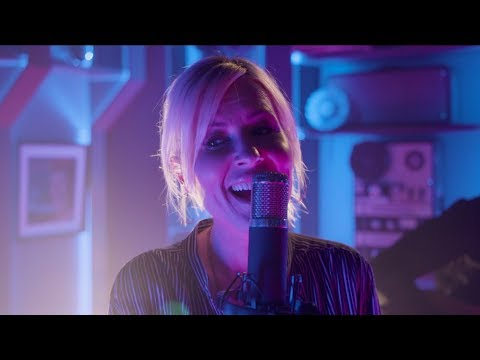

In [25]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZtejrJ7T764')

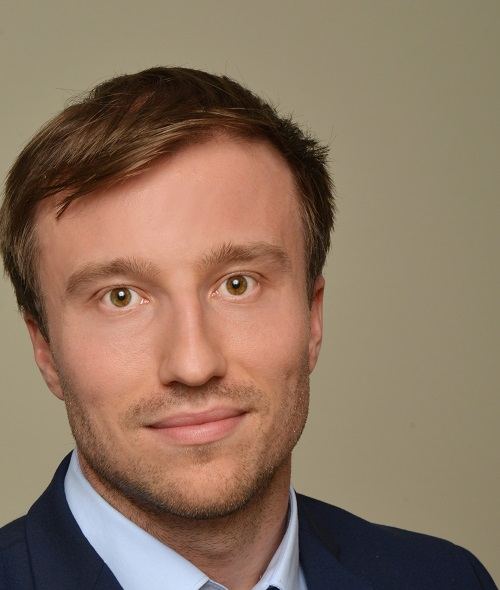

In [26]:
from IPython.display import Image
i = Image(filename='C:\Anaconda\data\Szuhai_Tamas_2016.JPG')
i

The following recipe shows how to find the integer location of the columns and then
use .iloc to complete the selection.
Use the Index method get_loc to find the integer position of the desired
columns:

In [27]:
col_start = college.columns.get_loc('UGDS_WHITE')
col_end = college.columns.get_loc('UGDS_UNKN') + 1   # azért kell a +1 mert exclusive a range
col_start, col_end

(10, 19)

In [28]:
college.iloc[:5, col_start:col_end]   # Tehát az első 5 sor és az oszlopok a White-tól a Unknownig.


,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


How it works...
Step 2 first retrieves the column index through the columns attribute. Indexes have a
get_loc method, which accepts an index label and returns its integer location. We find
both the start and end integer locations for the columns that we wish to slice. We add one
because slicing with .iloc is exclusive of the last item. Step 3 uses slice notation with the
rows and columns.

We can do a very similar operation to make .loc work with a mixture of integers and
positions. The following shows how to select the 10th through 15th (inclusive) rows, along
with columns UGDS_WHITE through UGDS_UNKN:

In [29]:
row_start = college.index[10]
row_end = college.index[15]
college.loc[row_start:row_end, 'UGDS_WHITE':'UGDS_UNKN']

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Birmingham Southern College,0.7983,0.1102,0.0195,0.0517,0.0102,0.0000,0.0051,0.0000,0.0051
Chattahoochee Valley Community College,0.4661,0.4372,0.0492,0.0127,0.0023,0.0035,0.0151,0.0000,0.0139
Concordia College Alabama,0.0280,0.8758,0.0373,0.0093,0.0000,0.0000,0.0031,0.0466,0.0000
South University-Montgomery,0.3046,0.6054,0.0153,0.0153,0.0153,0.0096,0.0000,0.0019,0.0326
Enterprise State Community College,0.6408,0.2435,0.0509,0.0202,0.0081,0.0029,0.0254,0.0012,0.0069
James H Faulkner State Community College,0.6979,0.2259,0.0320,0.0084,0.0177,0.0014,0.0152,0.0007,0.0009


## Speeding up scalar selection

# Könyv 126. oldal
Both the .iloc and .loc indexers are capable of selecting a single element, a scalar value,
from a Series or DataFrame. However, there exist the indexers, .iat and .at, which
respectively achieve the same thing at faster speeds. Like .iloc, the .iat indexer uses
integer location to make its selection and must be passed two integers separated by a
comma. Similar to .loc, the .at index uses labels to make its selection and must be passed
an index and column label separated by a comma.

This recipe is valuable if computational time is of utmost importance. It shows the
performance improvement of .iat and .at over .iloc and .loc when using scalar
selection.

In [30]:
cn = 'Texas A & M University-College Station'
college.loc[cn, 'UGDS_WHITE']

0.6609999999999999

In [31]:
#Achieve the same result with .at:
college.at[cn, 'UGDS_WHITE']

0.6609999999999999

Use the %timeit magic command to find the difference in speed:

In [32]:
%timeit college.loc[cn, 'UGDS_WHITE']   
# Nálam: 5.45 µs ± 442 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

7.9 µs ± 359 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [33]:
%timeit college.at[cn, 'UGDS_WHITE']
# Nálam: 3.38 µs ± 21.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

5.57 µs ± 821 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Find the integer locations of the preceding selections and then time the difference
between .iloc and .iat:

In [34]:
row_num = college.index.get_loc(cn)
col_num = college.columns.get_loc('UGDS_WHITE')
row_num, col_num

(3765, 10)

In [35]:
%timeit college.iloc[row_num, col_num]
# Nálam: 5.94 µs ± 192 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

8.27 µs ± 156 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [36]:
%timeit college.iat[row_num, col_num]
# Nálam: 3.48 µs ± 19.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

5.41 µs ± 269 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The scalar indexers, .iat and .at, only accept scalar values. They fail if anything else is
passed to them. They are drop-in replacements for .iloc and .loc when doing scalar
selection. The timeit magic command times entire blocks of code when preceded by two
percentage signs and a single time when preceded by one percentage sign. It shows that
about 2.5 microseconds are saved on average by switching to the scalar indexers. This might
not be much but can add up quickly if scalar selection is repeatedly done in a program.
Both .iat and .at work with Series as well. Pass them a single scalar value, and they will
return a scalar:

In [37]:
college.columns

Index(['CITY', 'STABBR', 'HBCU', 'MENONLY', 'WOMENONLY', 'RELAFFIL',
       'SATVRMID', 'SATMTMID', 'DISTANCEONLY', 'UGDS', 'UGDS_WHITE',
       'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI',
       'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF', 'CURROPER', 'PCTPELL',
       'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP'],
      dtype='object')

In [38]:
state = college['STABBR']
state.iat[1000]

'IL'

In [39]:
state.at['Stanford University']

'CA'

## Slicing rows lazily

# Könyv 128. oldal
A shortcut to select the
rows exists with just the indexing operator itself. This is just a shortcut to show additional
features of pandas, but the primary function of the indexing operator is actually to select
DataFrame columns. If you want to select rows, it is best to use .iloc or .loc, as they are
unambiguous.

In [40]:
# select every other row from index 10 to 20:
college[10:20:2]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Birmingham Southern College,Birmingham,AL,0.0,0.0,0.0,1,560.0,560.0,0.0,1180.0,...,0.0051,0.0000,0.0051,0.0017,1,0.1920,0.4809,0.0152,44200,27000
Concordia College Alabama,Selma,AL,1.0,0.0,0.0,1,420.0,400.0,0.0,322.0,...,0.0031,0.0466,0.0000,0.1056,1,0.8667,0.9333,0.2367,19900,PrivacySuppressed
Enterprise State Community College,Enterprise,AL,0.0,0.0,0.0,0,NaN,NaN,0.0,1729.0,...,0.0254,0.0012,0.0069,0.3823,1,0.4895,0.2263,0.3399,24600,8273
Faulkner University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,0.0,2367.0,...,0.0173,0.0182,0.0258,0.2302,1,0.5812,0.7253,0.4589,37200,22000
New Beginning College of Cosmetology,Albertville,AL,0.0,0.0,0.0,0,NaN,NaN,0.0,115.0,...,0.0000,0.0000,0.0000,0.0783,1,0.8224,0.8553,0.3933,NaN,5500


In [41]:
start = 'Mesa Community College'
stop = 'Spokane Community College'
college[start:stop:2]   # every other row

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Mesa Community College,Mesa,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,19055.0,...,0.0205,0.0257,0.0682,0.6457,1,0.3423,0.2207,0.4010,35200,8000
ITT Technical Institute-Tempe,Tempe,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,445.0,...,0.0292,0.0000,0.0270,0.2854,0,0.7229,0.8012,0.7048,38800,25827.5
Universal Technical Institute of Arizona Inc-Motorcycle Mechanics Institute Division,Phoenix,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,1724.0,...,0.0812,0.0012,0.0673,0.0000,1,0.4898,0.6014,0.5710,34800,18139
Northern Arizona University,Flagstaff,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,23189.0,...,0.0517,0.0482,0.0060,0.1735,1,0.3662,0.5376,0.1989,39100,20500
Ottawa University-Phoenix,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,345.0,...,0.0348,0.0029,0.1594,0.9942,1,0.5246,0.6203,0.8841,40300,22000
Cortiva Institute-Scottsdale,Scottsdale,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,87.0,...,0.0460,0.0000,0.1724,0.5402,1,0.4765,0.8591,0.6207,24000,7600
Pima Medical Institute-Tucson,Tucson,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,1948.0,...,0.0344,0.0005,0.0118,0.0000,1,0.5030,0.6390,0.6153,28200,8708
Prescott College,Prescott,AZ,0.0,0.0,0.0,0,545.0,503.0,0.0,454.0,...,0.0352,0.0485,0.1211,0.2004,1,0.4550,0.6073,0.3817,33300,24398.5
Rio Salado College,Tempe,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,8366.0,...,0.0195,0.0053,0.0629,0.8099,1,0.1987,0.1779,0.4699,35900,9000


I titled this type of row slicing in this section as lazy, as it does not use the more explicit
.iloc or .loc. Personally, I always use these indexers whenever slicing rows, as there is
never a question of exactly what I am doing.

In [42]:
# college[:10, ['CITY', 'STABBR']]
# TypeError: unhashable type: 'slice'

In [43]:
first_ten_instnm = college.index[:10]
college.loc[first_ten_instnm, ['CITY', 'STABBR']]

,CITY,STABBR
INSTNM,,
Alabama A & M University,Normal,AL
University of Alabama at Birmingham,Birmingham,AL
Amridge University,Montgomery,AL
University of Alabama in Huntsville,Huntsville,AL
Alabama State University,Montgomery,AL
The University of Alabama,Tuscaloosa,AL
Central Alabama Community College,Alexander City,AL
Athens State University,Athens,AL
Auburn University at Montgomery,Montgomery,AL


## Slicing lexicographically

In [44]:
''' college.loc['Sp':'Su']
As the index is not sorted, the preceding command fails.
Let's go ahead and sort the index: '''
college = college.sort_index()

In [45]:
college.loc['Sp':'Su']    # Slicing like this is still inclusive of the last index

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Spa Tech Institute-Ipswich,Ipswich,MA,0.0,0.0,0.0,0,NaN,NaN,0.0,37.0,...,0.0000,0.0000,0.0541,0.4054,1,0.2656,0.3906,0.7907,21500,6333
Spa Tech Institute-Plymouth,Plymouth,MA,0.0,0.0,0.0,0,NaN,NaN,0.0,153.0,...,0.0000,0.0000,0.2484,0.3399,1,0.3716,0.4266,0.6250,21500,6333
Spa Tech Institute-Westboro,Westboro,MA,0.0,0.0,0.0,0,NaN,NaN,0.0,90.0,...,0.0000,0.0000,0.0222,0.5778,1,0.3409,0.4545,0.6882,21500,6333
Spa Tech Institute-Westbrook,Westbrook,ME,0.0,0.0,0.0,0,NaN,NaN,0.0,240.0,...,0.0000,0.0000,0.0042,0.2542,1,0.4350,0.5093,0.5224,21500,6333
Spalding University,Louisville,KY,0.0,0.0,0.0,1,490.0,440.0,0.0,1227.0,...,0.0302,0.0016,0.0326,0.2502,1,0.4442,0.6725,0.3764,41700,25000
Spanish-American Institute,New York,NY,0.0,0.0,0.0,0,NaN,NaN,0.0,0.0,...,0.0000,0.0000,0.0000,NaN,1,NaN,NaN,0.8667,19700,NaN
Spartan College of Aeronautics & Technology,Inglewood,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,414.0,...,0.0000,0.0048,0.0531,0.0000,1,0.7507,0.7698,0.5066,41000,24059
Spartan College of Aeronautics and Technology,Tulsa,OK,0.0,0.0,0.0,0,NaN,NaN,0.0,849.0,...,0.0978,0.0118,0.0106,0.0000,1,0.8592,0.9547,0.3843,39300,18018.5
Spartanburg Community College,Spartanburg,SC,0.0,0.0,0.0,0,NaN,NaN,0.0,4694.0,...,0.0245,0.0002,0.0109,0.4495,1,0.5409,0.1414,0.3380,25500,4500


You can determine which direction the index is sorted with the index attribute,
is_monotonic_increasing or is_monotonic_decreasing. Either of these must be
True in order for lexicographic slicing to work. For instance, the following code
lexicographically sorts the index from Z to A:

In [46]:
college = college.sort_index(ascending=False)
print(college.index.is_monotonic_decreasing)
college.loc['E':'B']

True


,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Dyersburg State Community College,Dyersburg,TN,0.0,0.0,0.0,0,NaN,NaN,0.0,2001.0,...,0.0185,0.0010,0.0085,0.4423,1,0.4921,0.2493,0.3097,26800,7475
Dutchess Community College,Poughkeepsie,NY,0.0,0.0,0.0,0,NaN,NaN,0.0,6885.0,...,0.0446,0.0129,0.0049,0.3312,1,0.2464,0.1936,0.1806,32500,10250
Dutchess BOCES-Practical Nursing Program,Poughkeepsie,NY,0.0,0.0,0.0,0,NaN,NaN,0.0,155.0,...,0.0581,0.0000,0.0000,0.7548,1,0.5294,0.6275,0.5430,36500,9500
Durham Technical Community College,Durham,NC,0.0,0.0,0.0,0,NaN,NaN,0.0,4769.0,...,0.0182,0.0025,0.0457,0.6905,1,0.4495,0.1796,0.5961,27200,11069.5
Durham Beauty Academy,Durham,NC,0.0,0.0,0.0,0,NaN,NaN,0.0,78.0,...,0.0000,0.0000,0.0128,0.0000,1,0.5746,0.8134,0.4000,PrivacySuppressed,15332
Duquesne University,Pittsburgh,PA,0.0,0.0,0.0,1,570.0,565.0,0.0,5969.0,...,0.0235,0.0421,0.0126,0.0379,1,0.1983,0.6548,0.0536,54600,27000
Dunwoody College of Technology,Minneapolis,MN,0.0,0.0,0.0,0,NaN,NaN,0.0,1069.0,...,0.0458,0.0000,0.0327,0.1833,1,0.5892,0.8880,0.4967,46600,16000
Duluth Business University,Duluth,MN,0.0,0.0,0.0,0,NaN,NaN,0.0,179.0,...,0.0000,0.0000,0.0000,0.4246,1,0.7463,0.8905,0.6816,23500,28394
Duke University,Durham,NC,0.0,0.0,0.0,1,715.0,745.0,0.0,6480.0,...,0.0181,0.0951,0.0224,0.0014,1,0.1404,0.3130,0.0038,76700,7500
